<a href="https://colab.research.google.com/github/kshwan95/Machine-Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-07-28 13:53:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-28 13:53:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-28 13:53:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  #한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  rows = int(np.ceil(n/10))
  #행이 1개이면 열의 개수는 샘플 개수 입니다. 그렇지 않으면 10개 입니다.
  cols = n if rows <2 else 10
  fig,axs = plt.subplots(rows, cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()
 

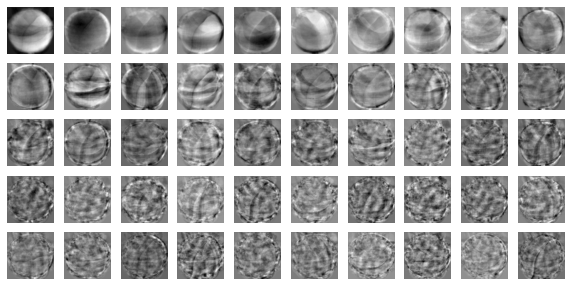

In [7]:
 draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [10]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


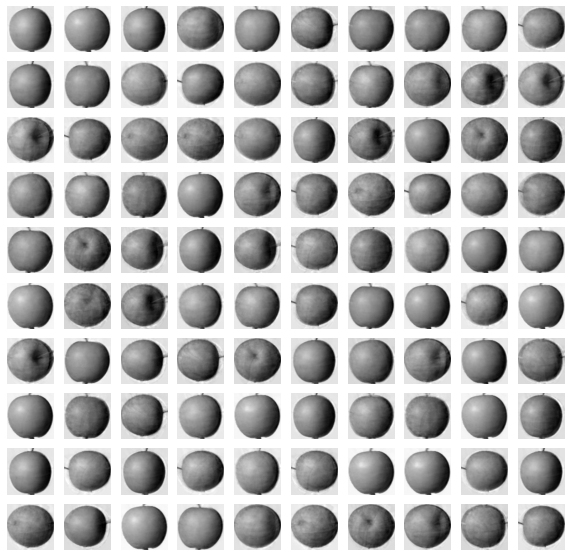

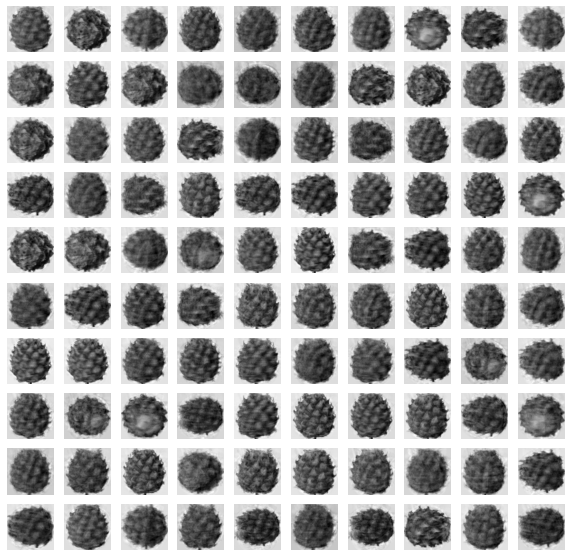

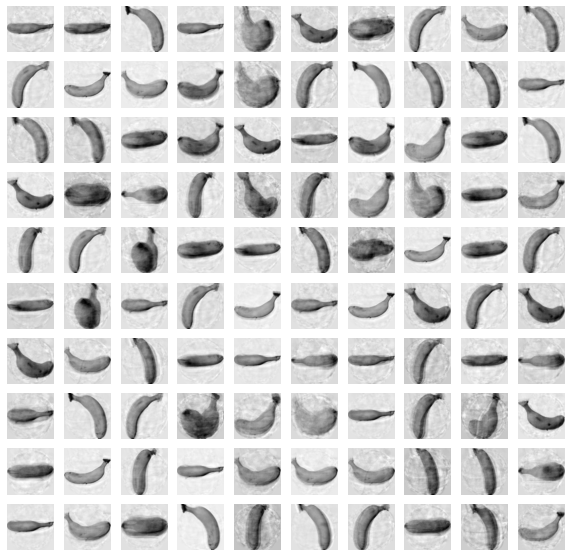

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215284171487279


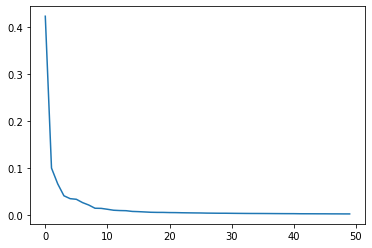

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)

In [18]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5620882987976075


In [19]:
scores = cross_validate(lr, fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.028003406524658204


In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print(pca.n_components_)

2


In [22]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.049722719192504886


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


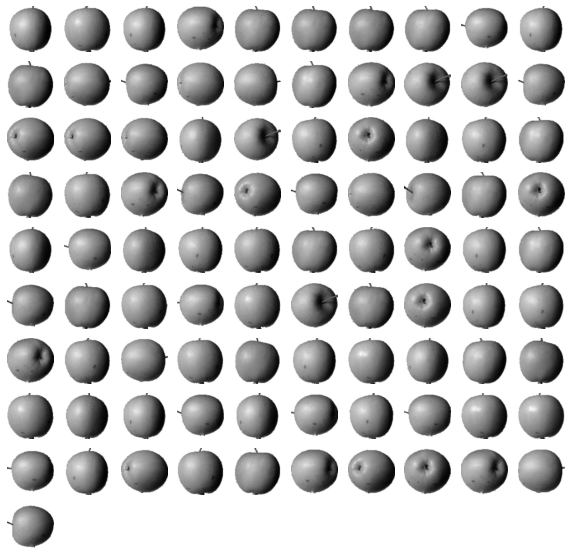

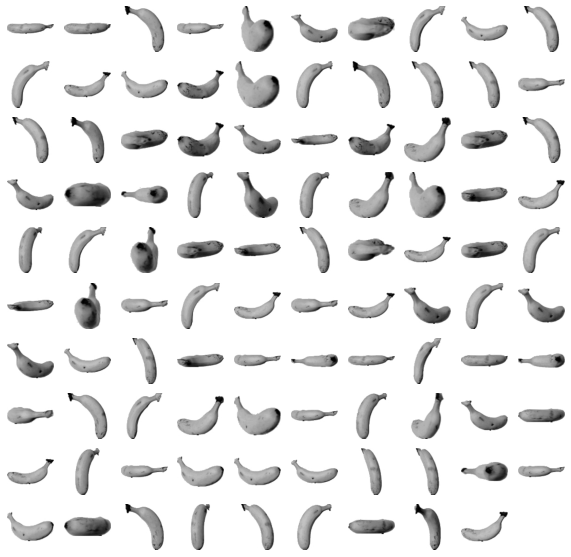

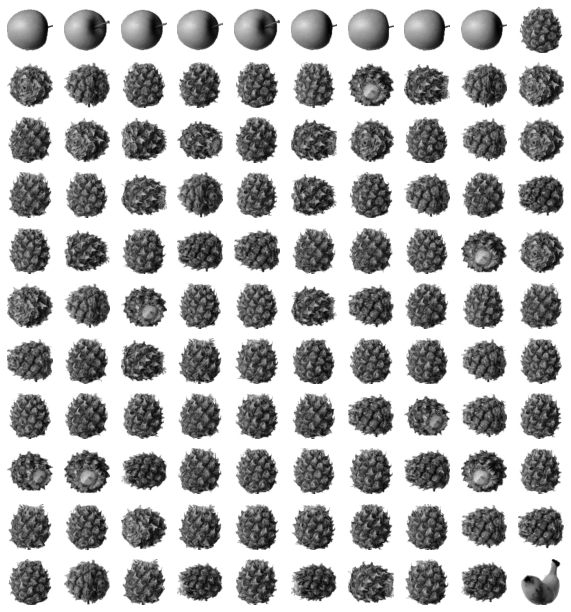

In [26]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

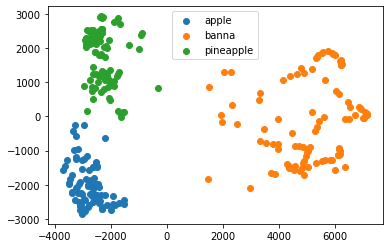

In [28]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banna','pineapple'])
plt.show()